In [1]:
import tensorflow as tf

import matplotlib.pyplot as plt

2023-09-21 19:54:33.817160: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-21 19:54:36.288608: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-21 19:54:36.290694: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-21 19:54:51.526286: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
import sys
sys.path.append('../')

from utils import normalize, create_mask

In [3]:
model = tf.keras.models.load_model("DUTS_set_unet_semantic_segmentation_512_512_+4_epochs.keras")

In [90]:
image_path = "../test_imgs/Untitled.png"

In [91]:
image = tf.image.decode_image(open(image_path, "rb").read())

w, h, _ = image.shape

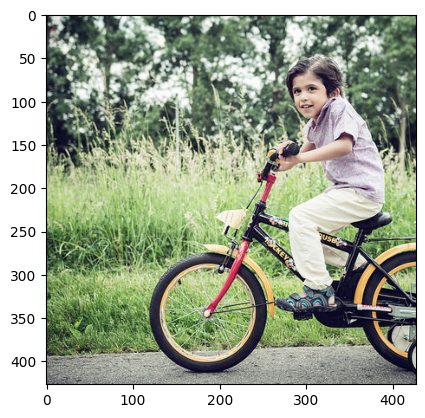

In [92]:
plt.imshow(image)

In [93]:
image = tf.image.resize(image, (512, 512))

image = normalize(image, 1)[0]

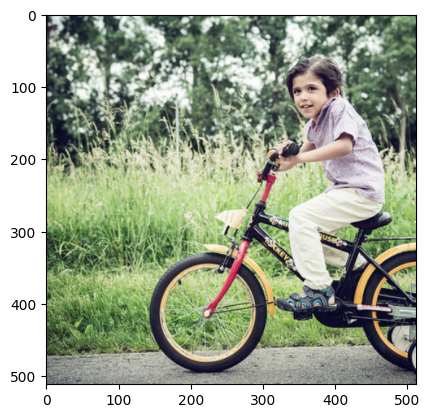

In [94]:
plt.imshow(image)

In [95]:
pred_img = create_mask(model.predict(tf.expand_dims(image, 0)))
pred_img = tf.cast(pred_img, tf.float32)

1/1 [==============================] - 1s 779ms/step


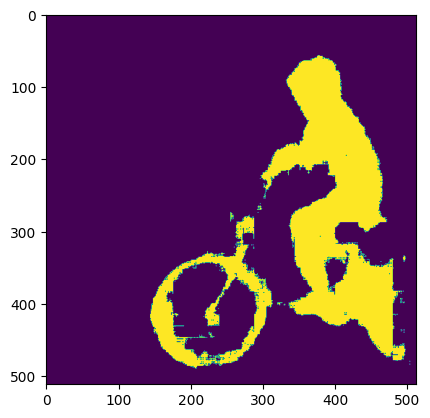

In [96]:
plt.imshow(pred_img)

In [97]:
masked_img =  image * pred_img

In [98]:
from PIL import Image
import numpy as np

arr = masked_img * 255
arr = tf.keras.utils.img_to_array(arr).astype(np.uint8)
im = Image.fromarray(arr)
im = im.convert("RGBA")
datas = im.getdata()

newData = []
for item in datas:
    if item[0] == 0 and item[1] == 0 and item[2] == 0:
        newData.append((0, 0, 0, 0))
    else:
        newData.append(item)

im.putdata(newData)

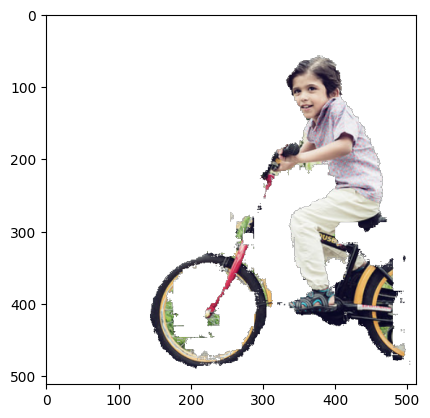

In [99]:
plt.imshow(im)

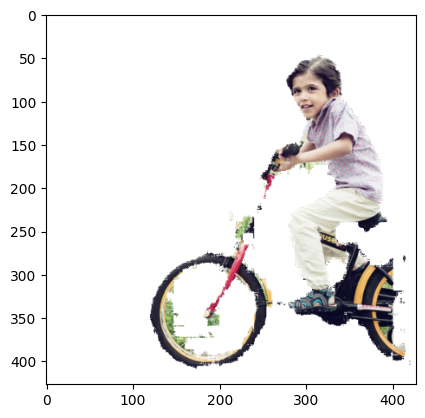

In [100]:
res_masked_img = im.resize((h, w))
#res_masked_img.save("test.png", "PNG")
plt.imshow(tf.cast(res_masked_img, tf.float32) / 255.0)